<a href="https://colab.research.google.com/github/Habibu-Ahmad/Modelling_Ribosome_Motion/blob/main/Ballistic/Estimate_kinetic_params.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1-some: alpha = 0.0829121976689067
2-some: alpha = 0.04911493253889405
3-some: alpha = 0.05411313331954654
4-some: alpha = 0.059324075696991725
Mean alpha = 0.06136608480608475
1-some: T(L) = 275.9980752702871 p= 0.4963802731806547
2-some: T(L) = 166.58735631659735 p= 0.822391344872735
3-some: T(L) = 182.12045572700984 p= 0.7522493805163583
4-some: T(L) = 197.715232609622 p= 0.6929157566250804
Mean T(L) = 205.60527998087906
p = 0.6663253006573604
137


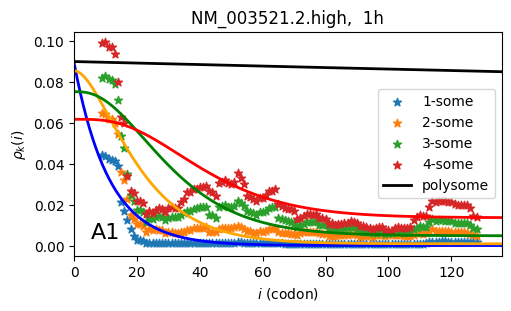

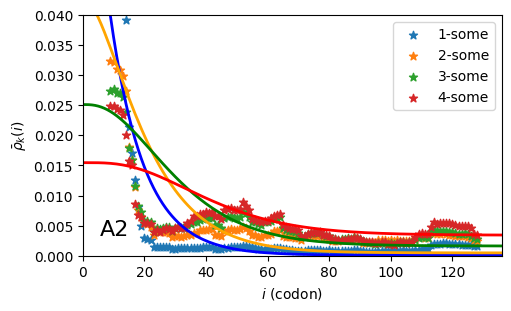

In [18]:
# Libraries
import matplotlib.pyplot as plt
from google.colab import drive
import scipy.special as spp
from math import factorial, exp
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Choices
window = 19  # smoothing window
Fitdata = True  # Show the ballistic densities with fitted parameters

# Functions
def Smooth_density(data, windowf, n_ribo):
    for i in range(len(data)):
        data[i]["Lissage"] = data[i]["Coverage"].rolling(windowf, min_periods=1, center=True).mean()
        reads = data[i]["Lissage"]
        norm = reads.agg('sum')
        data[i]["Lissage"] = data[i]["Lissage"] / norm * n_ribo

def Multiple_profiles(data, graphs, n_ligne, n_row, n_ribo):
    ballistic_colors = ['blue', 'orange', 'green', 'red']
    ax.set_xlabel(r"$i$ (codon)")
    if norm1 == False:
        ax.set_ylabel(r"${\rho}_k(i)$")
    else:
        ax.set_ylabel(r"$\bar{\rho}_k(i)$")
    length = len(data[graphs[0]]['Lissage'])
    if window == 1:
        ax.plot(np.linspace(1, length, length), data[graphs[0]]["Lissage"], '+-', label=str(n_ribo) + "-some")
    else:
        ax.scatter(np.linspace(int(window/2), length-int(window/2), length-2*int(window/2)+1),
                   data[graphs[0]]["Lissage"][int(window/2):length-int(window/2)+1],
                   marker='*', label=str(n_ribo) + "-some")
        if Fitdata == True:

            ax.plot(Ballistic_model_homo_dimensionless_parameters(mean_popt, 1/23400, length, n_ribo)[0],
                    color=ballistic_colors[n_ribo-1], lw=2)
    ax.set_xlim(0, length-1)

# k-some model function for curve_fit
def Ballistic_homo_for_fit(x, alpha, T_L):
    omega = 1 / 3600
    L = length
    s = omega + alpha
    Pk = omega / s * (alpha / s)**k_ * spp.gammainc(k_ + 1, s * T_L) + (alpha * T_L)**k_ / factorial(k_) * exp(-s * T_L)
    ballistic_ksome_density = omega / Pk / (L / T_L) * (alpha / s)**k_ * (spp.gammainc(k_, s * T_L) - spp.gammainc(k_, s * x / (L / T_L))) + alpha / Pk / (L / T_L) * (alpha * T_L)**(k_ - 1) / factorial(k_ - 1) * exp(-s * T_L)
    return ballistic_ksome_density

# k-some model function for plotting
def Ballistic_model_homo_dimensionless_parameters(tilde_alpha, tilde_omega, L, k):
    s = tilde_alpha + tilde_omega
    density = [0] * L
    polysome_density = [0] * L
    if norm1 == True:
        norm = k
    else:
        norm = 1

    Pk = tilde_omega / s * (tilde_alpha / s)**k * spp.gammainc(k + 1, s) + (tilde_alpha)**k / factorial(k) * exp(-s)
    for j in range(L):

        density[j] = (tilde_omega / Pk / L * (tilde_alpha / s)**k * (spp.gammainc(k, s) - spp.gammainc(k, s * j / L)) + tilde_alpha / Pk / L * (tilde_alpha)**(k - 1) / factorial(k - 1) * exp(-s)) / norm
        polysome_density[j] = tilde_alpha * exp(-tilde_omega * j / L) / L
    return density, polysome_density

# Data reading
dataRibo1 = [pd.read_csv('/content/drive/MyDrive/12NM_003536.2.high.tsv', delimiter="\t", usecols=[1, 2])]
Smooth_density(dataRibo1, window, 1)

dataRibo2 = [pd.read_csv('/content/drive/MyDrive/22NM_003536.2.high.tsv', delimiter="\t", usecols=[1, 2])]
Smooth_density(dataRibo2, window, 2)

dataRibo3 = [pd.read_csv('/content/drive/MyDrive/32NM_003536.2.high.tsv', delimiter="\t", usecols=[1, 2])]
Smooth_density(dataRibo3, window, 3)

dataRibo4 = [pd.read_csv('/content/drive/MyDrive/42NM_003536.2.high.tsv', delimiter="\t", usecols=[1, 2])]
Smooth_density(dataRibo4, window, 4)

Data = [dataRibo1, dataRibo2, dataRibo3, dataRibo4]

# Fitting
norm1 = False
length = len(dataRibo1[0]['Lissage'])
mean_popt = 0
for k_ in range(1, 5):
    T_L = 200  # Assuming T_L is known and fixed at 200
    popt, pcov = curve_fit(lambda x, alpha: Ballistic_homo_for_fit(x, alpha, T_L),
                           np.linspace(int(window/2), length-int(window/2), length-2*int(window/2)+1),
                           Data[k_-1][0]['Lissage'][int(window/2):length-int(window/2)+1],
                           bounds=(0, [0.1]), p0=[0.06])  # Set bounds and initial guess for alpha
    print(str(k_)+'-some: alpha = ' + str(popt[0]))
    mean_popt += popt[0]  # Extract the alpha value from popt
mean_popt = mean_popt / 4
print('Mean alpha = ' + str(mean_popt))

#Function plotting data
def Multiple_profiles(data,graphs,n_ligne,n_row,n_ribo) :
    ballistic_colors=['blue','orange','green','red']
    ax.set_xlabel(r"$i$ (codon)")
    if norm1==False:
            ax.set_ylabel(r"${\rho}_k(i)$")
    else:
            ax.set_ylabel(r"$\bar{\rho}_k(i)$")
    length=len(data[graphs[0]]['Lissage'])
    if window==1:
            ax.plot(np.linspace(1,length,length),data[graphs[0]]["Lissage"],'+-',label=str(n_ribo)+"-some")
    else:
            ax.scatter(np.linspace(int(window/2),length-int(window/2),length-2*int(window/2)+1),data[graphs[0]]["Lissage"][int(window/2):length-int(window/2)+1],marker='*',label=str(n_ribo)+"-some")
            if Fitdata==True:
                # Ensure that the parameters passed to Ballistic_model_homo_dimensionless_parameters are scalars
                ax.plot(Ballistic_model_homo_dimensionless_parameters(0.06*mean_popt,mean_popt/3600,length,n_ribo)[0],color=ballistic_colors[n_ribo-1],lw=2)
    ax.set_xlim(0,length-1)

#k-some model function for curve_fit
def Ballistic_homo_for_fit(x,T_L):
        omega=1/3600
        L=length
        alpha=0.06
        p=L/T_L
        s=omega+alpha
        Pk=omega/s*(alpha/s)**k_*spp.gammainc(k_+1,s*T_L)+(alpha*T_L)**k_/factorial(k_)*exp(-s*T_L)
        ballistic_ksome_density=omega/Pk/p*(alpha/s)**k_*(spp.gammainc(k_,s*T_L)-spp.gammainc(k_,s*x/p))+alpha/Pk/p*(alpha*T_L)**(k_-1)/factorial(k_-1)*exp(-s*T_L)
        return ballistic_ksome_density
        print(p)



# ----------------- FITTING -----------------
norm1=False
length=len(dataRibo1[0]['Lissage'])
mean_popt=0
for k_ in range(1,5):
    popt, pcov = curve_fit(Ballistic_homo_for_fit,np.linspace(int(window/2),length-int(window/2),length-2*int(window/2)+1),Data[k_-1][0]['Lissage'][int(window/2):length-int(window/2)+1])
    print(str(k_)+'-some: T(L) = '+str(popt[0]), 'p=', length/popt[0])
    mean_popt+=popt[0] # Extract the scalar value
mean_popt=mean_popt/4
# Ensure that mean_popt is treated as a scalar
print('Mean T(L) = '+str(mean_popt))
print("p =", length/mean_popt)
print(length)
# ----------------- PLOTTING ---------------
xsubplot=1
ysubplot=1

fig, ax=plt.subplots(ysubplot,xsubplot,figsize=(5,3),constrained_layout=True)

l = [0]
for k_ in range(4):
    Multiple_profiles(Data[k_],l,ysubplot,xsubplot,k_+1)

if Fitdata==True:

    ax.plot(Ballistic_model_homo_dimensionless_parameters(0.06*mean_popt,mean_popt/3600,length,1)[1], c='k',lw=2, label='polysome')
    ax.set_title("NM_003521.2.high,  1h")
    ax.text(0.04, 0.15, 'A1', transform=ax.transAxes, fontsize=16, va='top')
plt.legend()

fig, ax=plt.subplots(ysubplot,xsubplot,figsize=(5,3),constrained_layout=True)

norm1=True
for k_ in range(4):
    reads=Data[k_][0]["Lissage"] #reads is the column 1 of dataRibo
    norm=reads.agg('sum') #sum all reads
    Data[k_][0]["Lissage"]=Data[k_][0]["Lissage"]/norm #normalisation to 1
    Multiple_profiles(Data[k_],l,ysubplot,xsubplot,k_+1)
ax.set_ylim(0,0.04)
ax.text(0.04, 0.15, 'A2', transform=ax.transAxes, fontsize=16, va='top')
plt.legend()
plt.show()